---
# 4.지도학습_분류
---
## 4.1.분류의 개념
---

In [1]:
import numpy as np
import pandas as pd

def binary_tree(data, threshold):
    #초기화
    yes=[]
    no=[]
    
    #data로 부터 풍속 값마다 비교하기 위한 반복문
    for wind in data['풍속']:
        #스래스홀드 값과 비교하기 위해 분리
        if wind> threshold:
            yes.append(wind)
        else:
            no.append(wind)
    #예측한 결과를 데이터프레임 형태로 저장
    data_yes=pd.DataFrame({'풍속':yes,'예상 지연 여부':['yes']*len(yes)})
    data_no=pd.DataFrame({'풍속':no,'예상 지연 여부':['no']*len(no)})
    
    return data_no.append(data_yes, ignore_index=True)
    #data_no뒤에 data_yes붙이고 각각 인덱스 무시하고 새로 만들기
    
#풍속에 따른 항공지연 데이터
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5]
Delay  = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']

In [2]:
data=pd.DataFrame({'풍속':Wind, '지연':Delay})
print(data)

    풍속   지연
0  1.0   No
1  1.5   No
2  2.5   No
3  5.0  Yes
4  5.5  Yes
5  6.5  Yes


In [3]:
"""
1. binary_tree 모델을 사용하여 항공 지연 여부를 예측합니다.
   data의 지연 여부와 예상 지연 여부가 같은 값이 나오도록 의사결정나무의 
   결과물을 data_pred에 저장하세요.
"""
data_pred=binary_tree(data, threshold=4)
print(data_pred)

    풍속 예상 지연 여부
0  1.0       no
1  1.5       no
2  2.5       no
3  5.0      yes
4  5.5      yes
5  6.5      yes


---
## 4.2.의사결정나무_모델의 구조
---
### 4.2.1. 데이터 전처리

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
#저장된 데이터 가져오기
X,Y= load_iris(return_X_y=True)

In [6]:
#데이터프레임으로 변환
df=pd.DataFrame(X,columns=['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃입 넓이'])
df.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃입 넓이
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['클래스(품종)']=Y
df

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃입 넓이,클래스(품종)
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 4.2.2. 학습용, 평가용 데이터 분리

In [8]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y, test_size=0.2, random_state=42)

In [9]:
#원본데이터 출력
print(df)
#전처리한 데이터 5개만 추출,출력
print(train_X[:5])
print(train_Y[:5])
print(test_X[:5])
print(test_Y[:5])

     꽃받침 길이  꽃받침 넓이  꽃잎 길이  꽃입 넓이  클래스(품종)
0       5.1     3.5    1.4    0.2        0
1       4.9     3.0    1.4    0.2        0
2       4.7     3.2    1.3    0.2        0
3       4.6     3.1    1.5    0.2        0
4       5.0     3.6    1.4    0.2        0
..      ...     ...    ...    ...      ...
145     6.7     3.0    5.2    2.3        2
146     6.3     2.5    5.0    1.9        2
147     6.5     3.0    5.2    2.0        2
148     6.2     3.4    5.4    2.3        2
149     5.9     3.0    5.1    1.8        2

[150 rows x 5 columns]
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
[0 0 1 0 0]
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
[1 0 2 1 1]


### 4.2.3.의사결정나무 모델 초기화, 학습

In [10]:
from matplotlib import pyplot as plt
from sklearn import tree

In [11]:
DTmodel=DecisionTreeClassifier(max_depth=2)#깊이를 2칸까지만

In [12]:
DTmodel.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=2)

### 4.2.4. 학습된 결과 출력

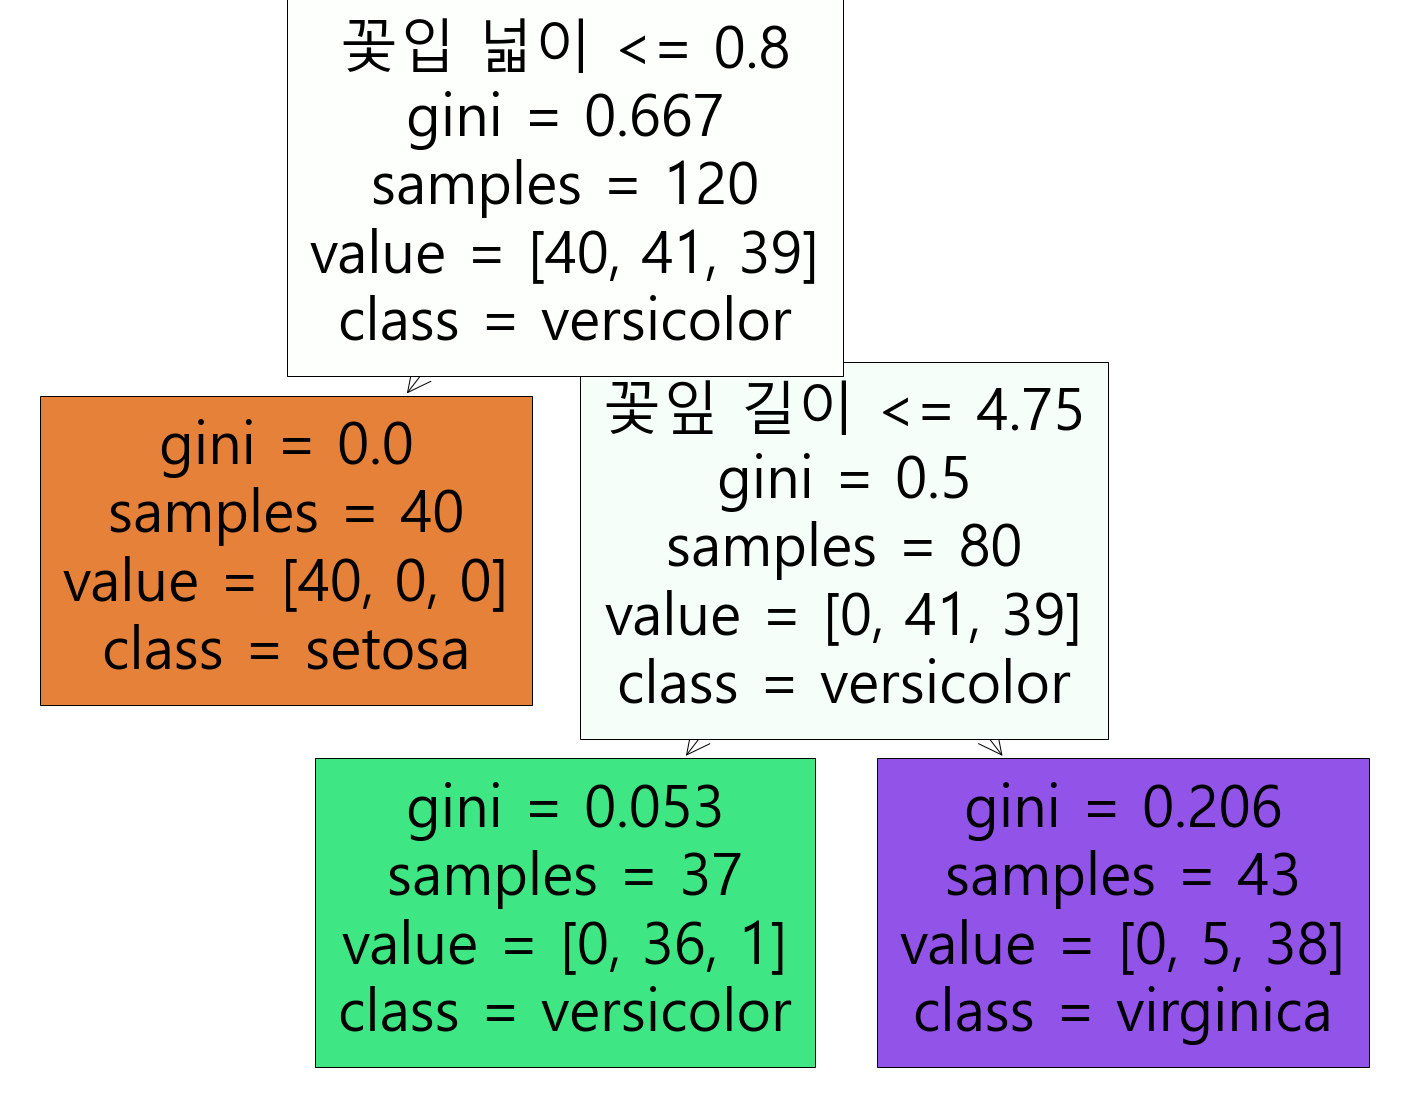

In [13]:
plt.rc('font', family="Malgun Gothic")
fig=plt.figure(figsize=(25,20))
tree.plot_tree(DTmodel,
               feature_names=['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃입 넓이'],
               class_names=['setosa','versicolor','virginica'],
               filled=True)
plt.show()              

### 4.2.5. 예측하기

In [14]:
#test data로 예측
DTmodel.predict(test_X)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

---
## 4.3. 분류 평가 지표
---
### 4.3.1. <4.2.>실습2

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [16]:
#데이터 불러오기
X,Y=load_breast_cancer(return_X_y=True)
X=np.array(X)
Y=np.array(Y)

In [17]:
len(X)

569

In [18]:
len(X[0]) #feature 개수

30

In [19]:
X.shape

(569, 30)

In [20]:
#학습용 데이터 평가용 데이터 분리
train_X,test_X,train_Y,test_Y=train_test_split(X,Y, test_size=0.2, random_state=42)

In [21]:
len(test_Y)#평가용 샘플 개수

114

In [22]:
len(test_Y)-sum(test_Y)#클래스 0인 평가용 샘플

43

In [23]:
sum(test_Y)#클래스 1인 평가용 샘플

71

In [24]:
#의사결정나무 모델 초기화해서 DTmodel 생성, 학습하기
DTmodel=DecisionTreeClassifier()
DTmodel.fit(train_X,train_Y)

DecisionTreeClassifier()

In [25]:
#예측
y_pred=DTmodel.predict(test_X)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

### 4.3.2. 혼동행렬

Confusion Matrix : 
 [[39  4]
 [ 3 68]]


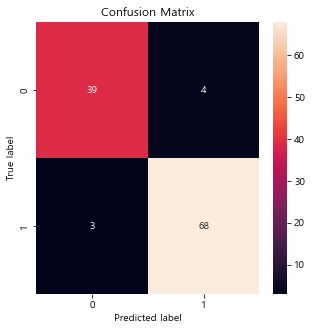

In [26]:
#혼동행렬

cm = confusion_matrix(test_Y, y_pred)
print('Confusion Matrix : \n {}'.format(cm))

# 혼동 행렬을 출력
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True)
ax.set(title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
fig.savefig("decistion_tree.png")

In [27]:
#예측한 값 저장
y_pred_train=DTmodel.predict(train_X)
y_pred_test=DTmodel.predict(test_X)

cm_train=confusion_matrix(train_Y, y_pred_train)
cm_test=confusion_matrix(test_Y, y_pred_test)

print('tain_X confusion_matrix:\n{}'.format(cm_train))
print('test_X confusion_matrix:\n{}'.format(cm_test))

tain_X confusion_matrix:
[[169   0]
 [  0 286]]
test_X confusion_matrix:
[[39  4]
 [ 3 68]]


#### 4.3.2.1. 정확도

In [28]:
#정확도 계산
acc_train = DTmodel.score(train_X,train_Y)
acc_test = DTmodel.score(test_X,test_Y)

# 정확도를 출력합니다.
print('train_X Accuracy: %f' % (acc_train))
print('test_X Accuracy: %f' % (acc_test))


train_X Accuracy: 1.000000
test_X Accuracy: 0.938596


In [29]:
accuracy_score(test_Y,y_pred)

0.9385964912280702

#### 4.3.2.2. 정밀도

In [30]:
#정밀도 계산
precision_train = precision_score(train_Y,y_pred_train)
precision_test = precision_score(test_Y,y_pred_test)

# 정밀도를 출력합니다.
print('train_X precision: %f' % (precision_train))
print('test_X precision: %f' % (precision_test))

train_X precision: 1.000000
test_X precision: 0.944444


#### 4.3.2.3. 재현율

In [31]:
#재현율
recall_train = recall_score(train_Y,y_pred_train)
recall_test = recall_score(test_Y,y_pred_test)

# 재현율를 출력합니다.
print('train_X recall: %f' % (recall_train))
print('test_X recall: %f' % (recall_test))

train_X recall: 1.000000
test_X recall: 0.957746
